In [1]:
from ROOT import TCanvas
from ROOT import TGraph
from array import array
import math

ichoice = 1

n = 21
dfunc = array('d')
dfunch = array('d')
dfunchh = array('d')
xfunc = array('d')
xfunchp = array('d')
xfunchm = array('d')
xfunchpp = array('d')
xfunchmm = array('d')
x = array('d')
diff = array('d')
difftwo = array('d')
xval = 1.0

if ichoice == 1:
    print ("Using forward derivative ... ")
elif ichoice == 2:
    print ("Using centered derivative ... ")
else:
    print ("Using both methods ... ")

Welcome to JupyROOT 6.18/00
Using forward derivative ... 


In [3]:
for i in range(0,n):

    hpower=i-n+1;
    x.append(math.pow(10.0,int(hpower)));
    dfunc.append(3.0e+00*xval*xval);
    xfunc.append(xval*xval*xval);
    xfunchp.append((xval+x[i])*(xval+x[i])*(xval+x[i]));
    xfunchm.append((xval-x[i])*(xval-x[i])*(xval-x[i]));
    xfunchpp.append((xval+x[i]+x[i])*(xval+x[i]+x[i])*(xval+x[i]+x[i]));
    xfunchmm.append((xval-x[i]-x[i])*(xval-x[i]-x[i])*(xval-x[i]-x[i]));

    if ichoice == 1:
        dfunch.append((xfunchp[i]-xfunc[i])/(x[i]));
        diff.append(abs(dfunc[i]-dfunch[i]));
        print ('{} {} {} {} {} {} {} {}'.format(i,x[i],xfunc[i],xfunchp[i],xfunchm[i],dfunc[i],dfunch[i],diff[i]))
    elif ichoice == 2:
        dfunch.append((xfunchp[i]-xfunchm[i])/(2.0e+00*x[i]));
        diff.append(abs(dfunc[i]-dfunch[i]));
        print ('{} {} {} {} {} {} {} {}'.format(i,x[i],xfunc[i],xfunchp[i],xfunchm[i],dfunc[i],dfunch[i],diff[i]))
    else:
        dfunch.append((xfunchp[i]-xfunc[i])/(x[i]));
        dfunchh.append((xfunchp[i]-xfunchm[i])/(2.0e+00*x[i]));
        diff.append(abs(dfunc[i]-dfunch[i]));
        difftwo.append(abs(dfunc[i]-dfunchh[i]));
        print ('{} {} {} {} {} {} {} {}'.format(i,x[i],xfunc[i],xfunchp[i],xfunchm[i],dfunc[i],dfunch[i],diff[i]))

0 1e-20 1.0 1.0 1.0 3.0 0.0 3.0
1 1e-19 1.0 1.0 1.0 3.0 0.0 3.0
2 1e-18 1.0 1.0 1.0 3.0 0.0 3.0
3 1e-17 1.0 1.0 1.0 3.0 0.0 3.0
4 1e-16 1.0 1.0 0.9999999999999997 3.0 0.0 3.0
5 1e-15 1.0 1.0000000000000033 0.999999999999997 3.0 3.330669073875469 0.3306690738754692
6 1e-14 1.0 1.00000000000003 0.99999999999997 3.0 2.9976021664879227 0.002397833512077341
7 1e-13 1.0 1.0000000000002998 0.9999999999996999 3.0 2.9976021664879227 0.002397833512077341
8 1e-12 1.0 1.0000000000030003 0.9999999999970001 3.0 3.000266701747023 0.00026670174702303484
9 1e-11 1.0 1.00000000003 0.99999999997 3.0 3.000000248221113 2.482211129972711e-07
10 1e-10 1.0 1.0000000003 0.9999999997 3.0 3.000000248221113 2.482211129972711e-07
11 1e-09 1.0 1.0000000030000002 0.9999999970000001 3.0 3.000000248221113 2.482211129972711e-07
12 1e-08 1.0 1.00000003 0.9999999700000002 3.0 3.0000000039720476 3.972047579736682e-09
13 1e-07 1.0 1.0000003000000302 0.9999997000000301 3.0 3.000000301511818 3.0151181817927863e-07
14 1e-06 1

array('d', [1e-20, 1e-19, 1e-18, 1e-17, 1e-16, 1e-15, 1e-14, 1e-13, 1e-12, 1e-11, 1e-10, 1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0])
array('d', [3.0, 3.0, 3.0, 3.0, 3.0, 0.3306690738754692, 0.002397833512077341, 0.002397833512077341, 0.00026670174702303484, 2.482211129972711e-07, 2.482211129972711e-07, 2.482211129972711e-07, 3.972047579736682e-09, 3.0151181817927863e-07, 2.999797857228259e-06, 3.0000110953221082e-05, 0.00030000999873536216, 0.003000999999505538, 0.030099999999991134, 0.31000000000000405, 4.0])


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


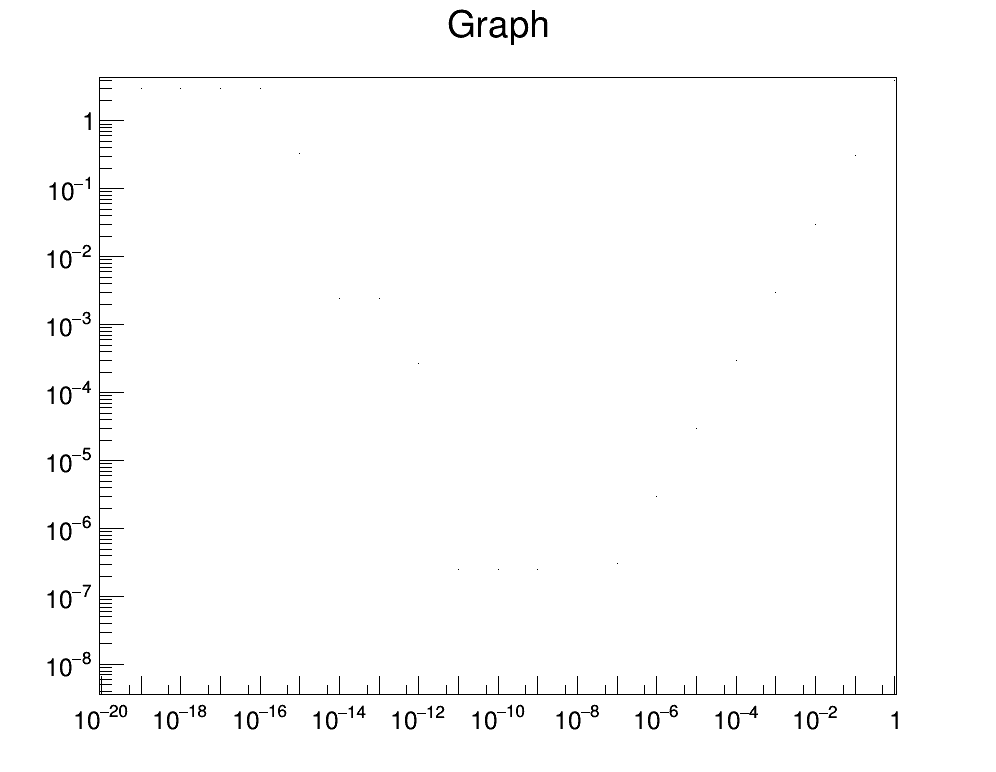

In [8]:
c1 = TCanvas("c1","c1",0,0,1000,800)
gr = TGraph(n,x,diff)
gr.Draw("AP")
c1.SetLogx()
c1.SetLogy()
c1.Draw()